#   Matplotlib Scatter Plots

Load in data.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

We'll subset this data to only Data Analysts so we have more meaningful insights.

In [2]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

##  Scatter Plot

**Notes**

*   scatter() - create a scatter plot of x vs y.
*   Common parameters:
>   *   x, y - Column names or positions to plot, typically one column for the x-axis and another for the y-axis.
>   *   s - The size of each point. Can be a single size or an array for varying sizes.
>   *   c - Color of each marker. Can specify a single color or an array to have different colors for each point.
>   *   marker - The style of the marker. You can use markers like o, ^, *, etc.
>   *   alpha - The blending value of the markers, between 0 (transparent) and 1 (opaque).
*   Syntax: plt.scatter(df['x'], df['y'], s=df['size'], c=df['color'], alpha=0.5, marker='o')
*   Scatter plots compare different categories or groups of data.

**Example**

Create a scatter plot that plots the count of job postings using job_skills for each skill versus their median salary using salary_year_avg. The count will be on the x-axis while the salary year median will be on the y-axis.

In [10]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top 10 skills by highest salary
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


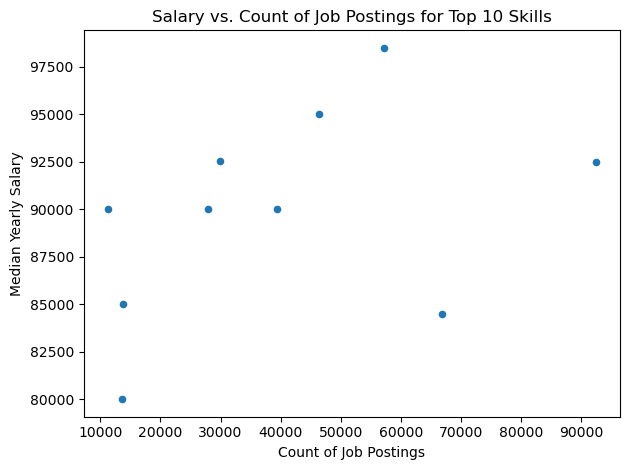

In [11]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

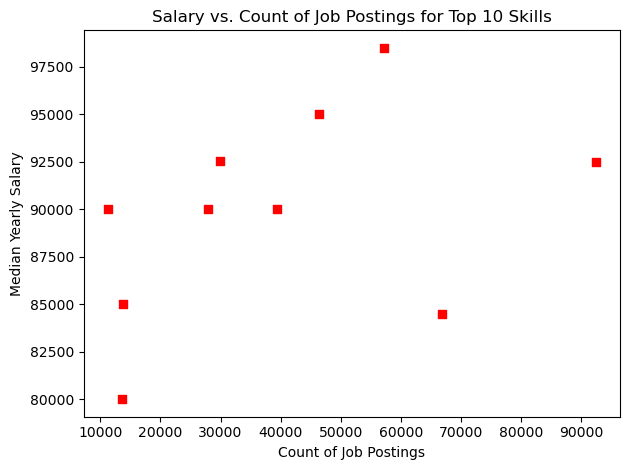

In [14]:
# skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.scatter(skill_stats['skill_count'], skill_stats['median_salary'], c='red', marker='s')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

Now, if you notice this scatter plot isn't the most helpful because we actually don't know what skills are the top 10. Nothing is labeled. Don't worry we'll come back to this plot and clean it up.

### Add Annotations

**Text**

*   text: Add text annotations to the plot.

**Common Arguments**

*   x: The x-coordinate for the text
*   y: The y-coordinate for the text
*   s: The text to display
*   fontsize: The font size of the text
*   color: The color of the text
*   ha: Horizontal alignment of the text
*   va: Vertical alignment of the text

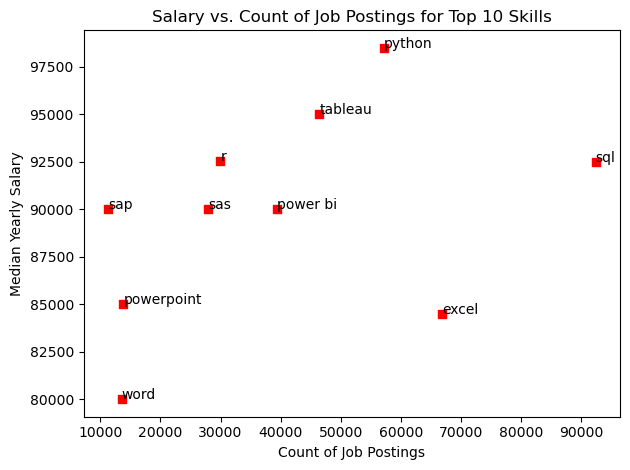

In [15]:
plt.scatter(skill_stats['skill_count'], skill_stats['median_salary'], c='red', marker='s')

# plt.text() function to label the points
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
    
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()